## OPTION 2: Conduct an unpooled regression comparison across time-periods. Compare at least two time periods, running regressions on each and comparing coefficients. Explain your results.

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
data = pd.read_csv("trends-gss.csv")

In [36]:
# recodes
data['yeshappy'] = np.where((data['happy'] <= 2), 1, 0)
data['yesmarried'] = np.where((data['marital'] == 1), 1, 0)
data['workhours'] = np.where((data['hrs1'] <= 45), 1, 0)
data['income'] = np.where((data['realrinc'] >= 0) & (data['realrinc'] <= 40053.3), 1, 0)
data['south'] = np.where((data['region'] >= 5) & (data['region'] <= 7), 1, 0)
data['nyear'] = data['year'] - 1973

### In this section, I recode variables that I will use later.  Regarding happy, I want to recode it to people who answered they are happy (very happy and pretty happy) and named yeshappy. Taken all together, how would you say things are these days--would you say that you are very happy, pretty happy, or not too happy? 1- very happy, 2-pretty happy, 3-not too happy. Regarding marital status, i recode marital to people who answered they are in married status, and called yesmarried. Regarding working hours, I recode hrs1 to workhours for those are working no more than 45 hours in a week.  Regarding family income, i recode realrinc to the family income ranging between 0 to 40053.3, the reason i chose 40053.3 is because that's the highest number in the mean of the entire dataset since 1973. To use this range, I want to see the impact of it on low and median income family.  Regarding region, i recode it to limit the area to south.  Therefore, In this question, I want to research on what will impact people's happy. In order to answer it, I had consider these variables, work hours, marital status, gender, income, age, education, region, and years. So the below multiple regression model will answer the correlation between happy and education for the group which lived in south, married, working no more than 45 hours, and in low and median income family, especially for three time periods, in 1980-1990, in 1990 - 2000, and 2000 to 2010.

In [72]:
happy80 = smf.ols('yeshappy ~ workhours + yesmarried + sex + income + age + educ + south + nyear', data=data[(data['year'] > 1980) & (data['year'] <= 1990)]).fit()
happy90 = smf.ols('yeshappy ~ workhours + yesmarried + sex + income + age + educ + south + nyear', data=data[(data['year'] > 1990) & (data['year'] <= 2000)]).fit()
happy00 = smf.ols('yeshappy ~ workhours + yesmarried + sex + income + age + educ + south + nyear', data=data[(data['year'] > 2000) & (data['year'] <= 2010)]).fit()

In [49]:
print(happy80.summary())

                            OLS Regression Results                            
Dep. Variable:               yeshappy   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     68.97
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          9.39e-112
Time:                        03:25:53   Log-Likelihood:                -4206.3
No. Observations:               14054   AIC:                             8431.
Df Residuals:                   14045   BIC:                             8498.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5507      0.023     23.664      0.0

### For this regression, it particularly for answer between the year in 1980 and 1990. The R-square is 0.038, which mean about 3.8% of variance in happy are explained by these independent variables. Looking at the pvalue, south has a pavlue = 0.693, it is greater than 0.05, suggesting it might not be statistically significant. Therefore, we could say, people who live in south wont matter for happy. For rest of variables, they are statistically significant as pvalue is lower than 0.05, so they have positive correlation on happy. Additionally, the variable 'nyear' appears to be statistically significant, suggesting that there is a time trend that is associated with changes in 'yeshappy' over the time period from 1980 to 1990.

In [50]:
print(happy90.summary())

                            OLS Regression Results                            
Dep. Variable:               yeshappy   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     72.60
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.82e-118
Time:                        03:25:59   Log-Likelihood:                -4167.1
No. Observations:               14591   AIC:                             8352.
Df Residuals:                   14582   BIC:                             8421.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6770      0.028     23.791      0.0

### For this regression, it particularly for answer between the year in 1990 and 2000. The R-square is 0.038, which mean about 3.8% of variance in happy are explained by these independent variables. It didnt change compared with first regression model. Looking at the pvalue, sex, south, and age are greater than 0.05, suggesting they might not be statistically significant.  Also, the variable 'nyear' appears to be statistically insignificant, suggesting that there is not a time trend that is associated with changes in 'yeshappy' over the time period between 1990 and 2000. Therefore, we could say, people who live in south, their gender, age, and yer wont matter for their happy. For rest of variables, they are statistically significant as pvalue is lower than 0.05, so working no more than 45 hours, married,  family income no more than around 40k, and education are having positive correlation on happy.  

In [51]:
print(happy00.summary())

                            OLS Regression Results                            
Dep. Variable:               yeshappy   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     222.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:26:02   Log-Likelihood:                -9130.6
No. Observations:               14069   AIC:                         1.828e+04
Df Residuals:                   14060   BIC:                         1.835e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5856      0.056    -28.487      0.0

### For this regression, it particularly for answer between the year in 2000 and 2010. The R-square is 0.112, which mean about 11.2% of variance in happy are explained by these independent variables. Looking at the pvalue, workhours, sex, income, age, ad south are greater than 0.05, suggesting they might not be statistically significant. Therefore, we could say, people who live in south, workhours, gender, age, and income wont matter for happy. For rest of variables, they are statistically significant as pvalue is lower than 0.05, so married and eduction are having positive correlation on happy. For instance, every one additional education earned, on average, 0.01 more in happy is increased. Also, the variable 'nyear' appears to be statistically significant, suggesting that there is a time trend that is associated with changes in 'yeshappy' over the time period from 2000 to 2010. Overall, compared with previous two models, we can concluded that this model fits better as r-square is higher than previous two. Therefore, this model is better to interpret how independent variables correlated with yeshappy. 

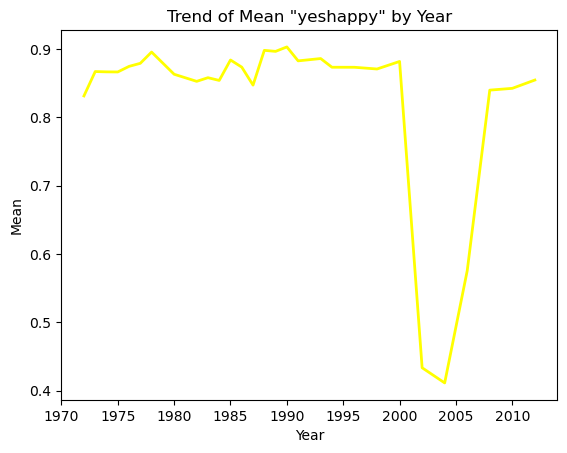

In [52]:
# visualize the trend
by_year = data.groupby('year')['yeshappy'].mean().reset_index()
plt.plot(by_year['year'], by_year['yeshappy'], color='yellow', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Trend of Mean "yeshappy" by Year')
plt.show()

### for this graph, we can see the trend of people who say answer yes in the happy question from year 1970 to 2010. On 2004, there is a big drop for people who think they are happy.

In [53]:
# give treatment on sex group and dummy variables
resulthappy80 = smf.ols('yeshappy ~ workhours + yesmarried + C(sex) + income + age + educ + south + nyear', data=data[(data['year'] > 1980) & (data['year'] <= 1990)]).fit()
resulthappy90 = smf.ols('yeshappy ~ workhours + yesmarried + C(sex) + income + age + educ + south + nyear', data=data[(data['year'] > 1990) & (data['year'] <= 2000)]).fit()
resulthappy00 = smf.ols('yeshappy ~ workhours + yesmarried + C(sex) + income + age + educ + south + nyear', data=data[(data['year'] > 2000) & (data['year'] <= 2010)]).fit()

In [56]:
print(resulthappy80.summary())

                            OLS Regression Results                            
Dep. Variable:               yeshappy   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     68.97
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          9.39e-112
Time:                        03:27:48   Log-Likelihood:                -4206.3
No. Observations:               14054   AIC:                             8431.
Df Residuals:                   14045   BIC:                             8498.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5651      0.022     26.250      

### In the following code, it gives the treatment on 'sex' for the second category, as we know is the female. For this regression, it particularly for answer between the year in 1980 and 1990. The R-square is 0.038, it didnt change compared with the first model. Looking at the pvalue,  income and south are greater than 0.05, suggesting they might not be statistically significant. Therefore, we could say, people who live in south and income wont matter for happy. For rest of variables, they are statistically significant as pvalue is lower than 0.05, so they can explain happy.  Also, the variable 'nyear' appears to be statistically significant, suggesting that there is a time trend that is associated with changes in 'yeshappy' over the time period from 1980 to 1990. Overall, compared with previous models, we can concluded that this model fits better as it can detect variables more accurate in terms of the p-value. Looking at C(sex)[T.2], we can say that when gender changed to male, on average, 0.0144 decreased in happy at statistically significant level.

In [57]:
print(resulthappy90.summary())

                            OLS Regression Results                            
Dep. Variable:               yeshappy   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     72.60
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.82e-118
Time:                        03:27:59   Log-Likelihood:                -4167.1
No. Observations:               14591   AIC:                             8352.
Df Residuals:                   14582   BIC:                             8421.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6711      0.027     24.680      

### For this regression, it particularly for answer between the year in 1990 and 2000. The R-square is 0.038, it didnt change compared with the second model. Looking at the pvalue,  female, age, and south are greater than 0.05, suggesting they might not be statistically significant. Also, the variable 'nyear' appears to be statistically significant, suggesting that there is a time trend that is associated with changes in 'yeshappy' over the time period from 1990 to 2000. Therefore, we could say, female people who live in south and their age wont matter for happy. For rest of variables, they are statistically significant as pvalue is lower than 0.05, so they can explain happy.

In [58]:
print(resulthappy00.summary())

                            OLS Regression Results                            
Dep. Variable:               yeshappy   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     222.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:28:14   Log-Likelihood:                -9130.6
No. Observations:               14069   AIC:                         1.828e+04
Df Residuals:                   14060   BIC:                         1.835e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.5906      0.054    -29.198      

### For this regression, it particularly for answer between the year in 2000 and 2010. The R-square is 0.112, which didnt change compared with third model. Looking at the pvalue, workhours, sex, income, age, ad south are greater than 0.05, suggesting they might not be statistically significant. Therefore, we could say, female people who live in south, workhours, age, and income wont matter for happy. For rest of variables, they are statistically significant as pvalue is lower than 0.05, so married and eduction are having positive correlation on happy. For instance, every one additional education earned, on average, 0.01 more in happy is increased. Also, the variable 'nyear' appears to be statistically significant, suggesting that there is a time trend that is associated with changes in 'yeshappy' over the time period from 2000 to 2010. Overall, compared with previous two models, we can concluded that this model fits better as r-square is higher than previous two. Therefore, this model is better to interpret how independent variables can explain the happy in female group at the time period from 2000 to 2010.¶

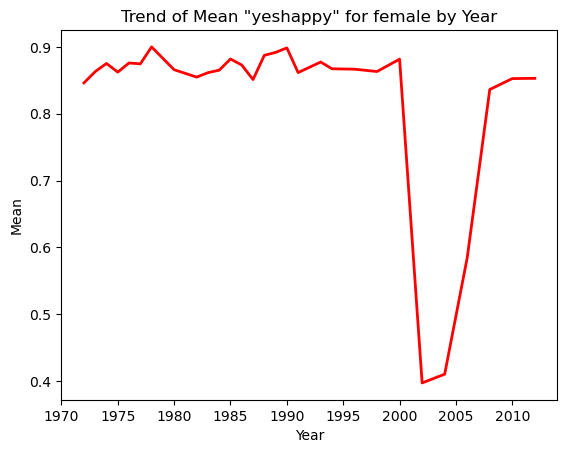

In [67]:
# visualize the trend
# female group
female_data = data[data['sex'] == 2]
by_year_female = female_data.groupby('year')['yeshappy'].mean().reset_index()
plt.plot(by_year_female['year'], by_year_female['yeshappy'], color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Mean')
plt.title('Trend of Mean "yeshappy" for female by Year')
plt.show()

### for this graph, we can see the trend of female respondents who say answer yes in the happy question from year 1970 to 2010. On 2001, there is a big drop for female group who think they are happy.

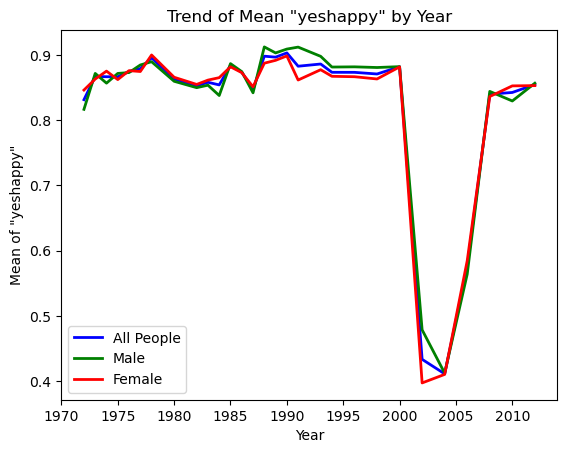

In [69]:
# Group by 'year' and calculate the mean of 'yesgun' for the original combined trend
by_year = data.groupby('year')['yeshappy'].mean().reset_index()

# Group by both 'year' and 'sex', and calculate the mean of 'yesgun' for male and female
by_year_sex = data.groupby(['year', 'sex'])['yeshappy'].mean().reset_index()

# Filter rows for males and females separately
male_data = by_year_sex[by_year_sex['sex'] == 1]
female_data = by_year_sex[by_year_sex['sex'] == 2]

# Plot the original combined trend
plt.plot(by_year['year'], by_year['yeshappy'], color='blue', linewidth=2, label='All People')

# Plot the trend for males
plt.plot(male_data['year'], male_data['yeshappy'], color='green', linewidth=2, label='Male')

# Plot the trend for females
plt.plot(female_data['year'], female_data['yeshappy'], color='red', linewidth=2, label='Female')

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Mean of "yeshappy"')
plt.title('Trend of Mean "yeshappy" by Year')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

### for this graph, we can see the trend of respondents who say answer yes in the happy question from year 1970 to 2010, for all group is in blue, for male is in green, and for female is in red. As we can see, there is a big drop for female and male group between year 2001 to 2004. Female group more likely to say they are unhappen in 2001, while male more likely to say they are unhappy in 2004. 

In [71]:
# Compare coefficients
from scipy.stats import norm
coefs = pd.DataFrame({'e80': resulthappy80.params,
                      'se80': resulthappy80.bse,
                      'e90': resulthappy90.params,
                      'se90': resulthappy90.bse,
                      'e00': resulthappy00.params,
                      'se00': resulthappy00.bse})

coefs['b1minusb28090'] = coefs['e80'] - coefs['e90']
coefs['denom8090'] = np.sqrt(coefs['se80'] ** 2 + coefs['se90'] ** 2)
coefs['Z8090'] = coefs['b1minusb28090'] / coefs['denom8090']
coefs['pvalue8090'] = 2 * (1 - norm.cdf(np.abs(coefs['Z8090'])))

coefs['b1minusb29000'] = coefs['e90'] - coefs['e00']
coefs['denom9000'] = np.sqrt(coefs['se90'] ** 2 + coefs['se00'] ** 2)
coefs['Z9000'] = coefs['b1minusb29000'] / coefs['denom9000']
coefs['pvalue9000'] = 2 * (1 - norm.cdf(np.abs(coefs['Z9000'])))

coefs['b1minusb28000'] = coefs['e80'] - coefs['e00']
coefs['denom8000'] = np.sqrt(coefs['se80'] ** 2 + coefs['se00'] ** 2)
coefs['Z8000'] = coefs['b1minusb28000'] / coefs['denom8000']
coefs['pvalue8000'] = 2 * (1 - norm.cdf(np.abs(coefs['Z8000'])))

# Display the final dataset
print(coefs)

                  e80      se80       e90      se90       e00      se00  \
Intercept    0.565129  0.021528  0.671084  0.027192 -1.590649  0.054478   
C(sex)[T.2]  0.014421  0.005634 -0.005932  0.005425 -0.005060  0.007880   
workhours    0.017044  0.006437  0.017892  0.006025  0.003969  0.008625   
yesmarried   0.099864  0.005583  0.105141  0.005383  0.055304  0.007904   
income       0.014943  0.006828  0.016161  0.006426  0.008392  0.008732   
age          0.000552  0.000177  0.000161  0.000174  0.000105  0.000245   
educ         0.010800  0.000930  0.009760  0.000934  0.010007  0.001282   
south        0.002312  0.005858  0.007979  0.005592 -0.005048  0.008090   
nyear        0.005393  0.001068  0.000051  0.000933  0.061658  0.001510   

             b1minusb28090  denom8090     Z8090  pvalue8090  b1minusb29000  \
Intercept        -0.105955   0.034682 -3.055010    0.002251       2.261732   
C(sex)[T.2]       0.020353   0.007821  2.602397    0.009257      -0.000872   
workhours      

### Overall, we could see the dummy variable regression model performed better, so i want to run a coefficient comparsion between three different time periods 1980-1990, 1990-2000, and 2000-2010. There are some observation from the table. For intercept section, the coefficients significantly differ between 1980-1990 and both 1990-2000 and 2000-2010. Second, the coefficient for 'C(sex)[T.2]' significantly differs between 1980-1990 and 1990-2000. Third, 'nyear' has a significant difference in coefficients between 1980-1990 and 2000-2010. Lastly, 'yesmarried' has significant differences in coefficients across all three time periods. The other variables do not show significant differences in coefficients across time periods.